# Changepoint inference for Poisson distributed samples using Gibbs Sampling

Notes were taken from "Bayesian Inference: Gibbs Sampling" by Ilker Yildirim (http://www.mit.edu/~ilkery/papers/GibbsSampling.pdf)

The definition of the conditional probability of event $B$ given event $A$ is given by:

$$
p(B|A) = \frac{p(A,B)}{p(A)}, p(A) > 0
$$

The joint probability $p(A,B)$ is given by:

$$
\begin{align}
p(A,B) &= p(B|A)p(A) \\
       &= p(A|B)p(B) \\
\end{align}
$$

therefore

$$
p(B|A) = \frac{p(A|B)p(B)}{p(A)}.
$$

Using the sum rule

$$
p(A) = \sum_{B_i} p(A,B_i)
$$

Bayes' theorem can be written as

$$
p(B|A) = \frac{p(A|B)p(B)}{ \sum_{B_i} p(A,B_i) }.
$$

The goal of Bayesian inference is to maintain a full posterior probability distribution over a set of random variables. However, using this distribution often involves computing integrals which are intractable in general. Sampling algorithms based on Markov Chain Monte Carlo (MCMC) techniques provide a means of finding solutions to such inference problems without having to solve those integrals.

## Generative changepoint model

Consider a dataset of discrete values $x_i$ where $0 \leq i \leq N-1$ where the mean of the values for timesteps $0$ to $n-1$ are different to those for timesteps $n$ to $N-1$. The samples in the dataset are drawn from a Poisson distribution, but the mean of the Poisson distribution $\lambda$ changes once at an unknown timestep $n$. The mean of the Poisson distribution up to time $n$ is denoted $\lambda_1$ and it becomes $\lambda_2$ afterwards.

The generative model is as follows:

$$
n \sim \text{Uniform}(0, 1, \dots, N-1)
$$

$$
\lambda_i \sim \text{Gamma}(\lambda_i; a, b)
$$

$$
x_i \sim 
\begin{cases}
 \text{Poisson}(x_i; \lambda_1) & 0 \leq i < n \\
 \text{Poisson}(x_i; \lambda_2) & n \leq i \leq N-1 \\
\end{cases}
$$

## Poisson distributed samples

The samples are drawn from Poisson distributions, depending on the timestep. The probability mass function for a Poisson distribution is given by

$$
\text{Poisson}(x;\lambda) = e^{-\lambda} \frac{\lambda}{x!}
$$

The natural log of the PDF for the Poisson distribution is given by

$$
\begin{align}
\ln \text{Poisson}(x;\lambda) &= \ln \big( e^{-\lambda} \frac{\lambda}{x!} \big) \\
&= \ln \big( e^{-\lambda} \big) + \ln \Big( \frac{\lambda^x}{x!} \Big) \\
&= -\lambda + \ln \lambda^x - \ln x! \\
&= -\lambda + x \ln \lambda - \ln x! \\
&= x \ln \lambda -\lambda - \ln x! \\
\end{align}
$$

Therefore the PMF of the Poisson distribution can be written as

$$
\begin{align}
\text{Poisson}(x;\lambda) &= e^{-\lambda} \frac{\lambda}{x!} \\
&= \exp \Big( x \ln \lambda -\lambda - \ln x! \Big)
\end{align}
$$

## Gamma distributed means of the Poisson distributions

The mean of the Poisson distribution $\lambda$ is modelled as being drawn from a Gamma distribution. The PDF of a Gamma distribution is given by

$$
\text{Gamma}(\lambda; a, b) = \frac{1}{\Gamma(a)} b^a \lambda^{a-1} \exp(-b \lambda)
$$

The natural log of the Gamma PDF is given by

$$
\begin{align}
\ln \text{Gamma}(\lambda; a, b) &= \ln \Big( \frac{1}{\Gamma(a)} b^a \lambda^{a-1} \exp(-b \lambda) \Big) \\
&= \ln \Big( \frac{1}{\Gamma(a)} \Big) + \ln b^a + \ln \lambda^{a-1} - b \lambda \\
&= \ln 1 - \ln \Gamma(a) + a \ln b + (a-1) \ln \lambda - b \lambda \\
&= (a-1) \ln \lambda - b \lambda - \ln \Gamma(a) + a \ln b  \\
\end{align}
$$

This is because $\ln 1 = 0$. Therefore, the Gamma PDF can be written as:

$$
\begin{align}
\text{Gamma}(\lambda; a, b) &= \frac{1}{\Gamma(a)} b^a \lambda^{a-1} \exp(-b \lambda) \\
&= \exp \Big( (a-1) \ln \lambda - b \lambda - \ln \Gamma(a) + a \ln b \Big)
\end{align}
$$

## Uniform distribution for timestep of the changepoint

The discrete uniform distribution has a piecewise probability mass function (PMF) given by

$$
\text{Uniform}(n; 0, 1, \dots, N-1) = 
\begin{cases}
 \frac{1}{N} & 0 \leq n \leq N-1 \\
 0           & \text{otherwise} \\
\end{cases}
$$

The natural log of the uniform distribution for $0 \leq n \leq N-1$ is given by

$$
\begin{align}
\ln \text{Uniform}(n; 0, 1, \dots, N-1) &= \ln \frac{1}{N} \\
                                        &= \ln 1 - \ln N \\
                                        &= - \ln N
\end{align}
$$

## Derivation of the joint distribution

From Bayes' theorem, the posterior distribution is given by

$$
p(\lambda_1, \lambda_2, n | x) = \frac{p(x|\lambda_1, \lambda_2, n) p(\lambda_1, \lambda_2, n)}{p(x)}
$$

The numerator is the **joint distribution**. The joint distribution is given by

$$
\begin{align}
p(\lambda_1, \lambda_2, n, x) &= p(x|\lambda_1, \lambda_2, n) p(\lambda_1, \lambda_2, n) \\
                              &= p(x|\lambda_1, \lambda_2, n) p(\lambda_1) p(\lambda_2) p(n) \\
                              &= p(x_{0:n-1} | \lambda_1) p(x_{n:N-1} | \lambda_2) p(\lambda_1) p(\lambda_2) p(n) \\
\end{align}
$$

The samples are assumed to be IID within a given section of the data, i.e. pre- or post-changepoint, therefore

$$
p(x_{0:n-1}) = \prod_{i=0}^{n-1} p(x_i | \lambda_1)
$$

$$
p(x_{n:N-1}) = \prod_{i=n}^{N-1} p(x_i | \lambda_2)
$$

Therefore, the joint distribution can be written as

$$
p(\lambda_1, \lambda_2, n, x) = \Big( \prod_{i=0}^{n-1} p(x_i | \lambda_1) \Big) \Big( \prod_{i=n}^{N-1} p(x_i | \lambda_2) \Big) p(\lambda_1) p(\lambda_2) p(n)
$$

The natural logarithm of the joint distribution is given by

$$
\begin{align}
\ln p(\lambda_1, \lambda_2, n, x) &= \ln \Big( \prod_{i=0}^{n-1} p(x_i | \lambda_1) \Big) + \ln \Big( \prod_{i=n}^{N-1} p(x_i | \lambda_2) \Big) + \ln p(\lambda_1) + \ln p(\lambda_2) +\ln p(n) \\
  &= \sum_{i=0}^{n-1} \ln p(x_i | \lambda_1) + \sum_{i=n}^{N-1} \ln p(x_i | \lambda_2) + \ln p(\lambda_1) + \ln p(\lambda_2) +\ln p(n)
\end{align}
$$

The samples prior to the changepoint are Poisson distributed, as are those after the changepoint (but with a different $\lambda$), therefore

$$
\begin{align}
\sum_{i=0}^{n-1} \ln p(x_i | \lambda_1) 
  &= \sum_{i=0}^{n} \Big( x_i \ln \lambda_1 -\lambda_1 - \ln x_i! \Big) \\
  &= \ln \lambda_1 \sum_{i=0}^{n} x_i - n \lambda_1 - \sum_{i=0}^{n} \ln x_i!
\end{align} 
$$

$$
\begin{align}
\sum_{i=n}^{N-1} \ln p(x_i | \lambda_2) 
  &= \sum_{i=n}^{N-1} \Big( x_i \ln \lambda_2 -\lambda_2 - \ln x_i! \Big) \\
  &= \ln \lambda_2 \sum_{i=n}^{N-1} x_i - (N-n) \lambda_2 - \sum_{i=n}^{N-1} \ln x_i!
\end{align} 
$$

The means of the Poisson distributions are Gamma distributed, therefore the log of the probability densities are given by

$$
\ln p(\lambda_1) = (a-1) \ln \lambda_1 - b \lambda_1 - \ln \Gamma(a) + a \ln b
$$

$$
\ln p(\lambda_2) = (a-1) \ln \lambda_2 - b \lambda_2 - \ln \Gamma(a) + a \ln b
$$

The location of the changepoint is uniformly distributed, therefore the log of the probability mass function is given by

$$
\ln p(n) = -\ln N
$$

Recall that the natural log of the joint distribution is given by

$$
\begin{align}
\ln p(\lambda_1, \lambda_2, n, x) 
  &= \sum_{i=0}^{n-1} \ln p(x_i | \lambda_1) + \sum_{i=n}^{N-1} \ln p(x_i | \lambda_2) + \ln p(\lambda_1) + \ln p(\lambda_2) +\ln p(n) \\
\end{align} 
$$

Substituting gives

$$
\begin{eqnarray}
\ln p(\lambda_1, \lambda_2, n, x) & = & \ln \lambda_1 \sum_{i=0}^{n} x_i - n \lambda_1 - \sum_{i=0}^{n} \ln x_i! + \\ 
                                  &   & \ln \lambda_2 \sum_{i=n}^{N-1} x_i - (N-n) \lambda_2 - \sum_{i=n}^{N-1} \ln x_i! + \\
                                  &   & (a-1) \ln \lambda_1 - b \lambda_1 - \ln \Gamma(a) + a \ln b + \\
                                  &   & (a-1) \ln \lambda_2 - b \lambda_2 - \ln \Gamma(a) + a \ln b - \\
                                  &   & \ln N
\end{eqnarray} 
$$

Collecting up the terms in the log of the joint posterior gives

$$
\begin{eqnarray}
\ln p(\lambda_1, \lambda_2, n, x) & = & \ln \lambda_1 \sum_{i=0}^{n-1} x_i - \sum_{i=0}^{n-1} \ln x_i! + \\
                                  &   & \ln \lambda_2 \sum_{i=n}^{N-1} x_i - \sum_{i=n}^{N-1} \ln x_i! + \\
                                  &   & (a-1) \ln \lambda_1 - \lambda_1 (n+b) + \\
                                  &   & (a-1) \ln \lambda_2 - \lambda_2 (b + N - n) + \\
                                  &   & 2(\ln \Gamma(a) + a \ln b) - N
\end{eqnarray} 
$$

## Conditional posterior distributions

The posterior conditional distributions for each variable are obtained by collecting the terms from the full joint distribution that include the variable of interest.

### Conditional posterior distributions for $\lambda_1$

The joint conditional probability distribution for $\lambda_1$ is given by

$$
\begin{align}
\ln p(\lambda_1 | \lambda_2, n, x) &\propto \ln p(\lambda_1, \lambda_2, n, x) \\
  &= \ln \lambda_1 \sum_{i=0}^{n-1} x_i + (a-1) \ln \lambda_1 - \lambda_1 (n+b) \\
  &= \ln \lambda_1 \Big( \sum_{i=0}^{n-1} x_i + a - 1 \Big) - (n + b)\lambda_1
\end{align}
$$

The log Gamma distribution is given by

$$
\ln \text{Gamma}(\lambda; \hat{a}, \hat{b}) = (\hat{a}-1) \ln \lambda - \hat{b} \lambda - \ln \Gamma(\hat{a}) + \hat{a} \ln \hat{b}
$$

therefore

$$
\hat{a} - 1 = \Big( \sum_{i=0}^{n-1} x_i \Big) + a - 1 \implies \hat{a} = \Big( \sum_{i=0}^{n-1} x_i \Big) + a
$$

$$
\hat{b} = n + b
$$

thus the joint conditional probability for $\lambda_1$ is given by

$$
\boxed{
p(\lambda_1 | \lambda_2, n, x) \sim Gamma \Big( \lambda_1; a + \sum_{i=0}^{n-1} x_i , n + b \Big)
}
$$

### Conditional posterior distributions for $\lambda_2$

The conditional posterior probability distribution for $\lambda_2$ is given by

$$
\begin{align}
\ln p(\lambda_2 | \lambda_1, n, x) &\propto \ln p(\lambda_1, \lambda_2, n, x) \\
  &= \ln \lambda_2 \sum_{i=n}^{N-1} x_i + (a-1) \ln \lambda_2 - \lambda_2 (b + N - n) \\
  &= \ln \lambda_2 \Big( \sum_{i=n}^{N-1} x_i + a - 1 \Big) - (b + N - n)\lambda_2
\end{align}
$$

The log Gamma distribution is given by

$$
\ln \text{Gamma}(\lambda; \hat{a}, \hat{b}) = (\hat{a}-1) \ln \lambda - \hat{b} \lambda - \ln \Gamma(\hat{a}) + \hat{a} \ln \hat{b}
$$

therefore

$$
\hat{a} - 1 = \Big( \sum_{i=n}^{N-1} x_i \Big) + a - 1 \implies \hat{a} = \Big( \sum_{i=n}^{N-1} x_i \Big) + a
$$

$$
\hat{b} = b + N - n
$$

thus the conditional posterior probability for $\lambda_2$ is given by

$$
\boxed{
p(\lambda_2 | \lambda_1, n, x) \sim Gamma \Big( \lambda_2; a + \sum_{i=n}^{N-1} x_i , b + N - n \Big)
}
$$

### Conditional posterior distributions for $n$

The log of the conditional posterior probability for $n$ is given by

$$
\begin{align}
\ln p(n| \lambda_1, \lambda_2, x) &\propto \ln p(\lambda_1, \lambda_2, n, x) \\
  &= \ln \lambda_1 \sum_{i=0}^{n} x_i + \ln \lambda_2 \sum_{i=n}^{N-1} x_i - \lambda_1 (n + b) + \lambda_2 (b + N - n)
\end{align}
$$

therefore the conditional posterior probability distribution for $n$ is

$$
\boxed{
p(n| \lambda_1, \lambda_2, x) \propto \exp \left\{  \ln \lambda_1 \sum_{i=0}^{n} x_i + \ln \lambda_2 \sum_{i=n}^{N-1} x_i - \lambda_1 n + \lambda_2 (N - n) \right\}
}
$$

The conditional posterior for $n$ is not of a known closed form, however, samples can be drawn from it using a multinominal distribution by computing $p(n| \lambda_1, \lambda_2, x)$ for $n = 0, 1, \dots, N-1$.

## Gibbs sampling

Gibbs sampling generates posterior samples by walking through each variable (or block of variables) to sample from its posterior conditional distribution, where the remaining variables are held constant.

Typically, the random variables are initialised by sampling from their prior distributions.

The iterative process of walking through the variables continues until convergence has been reached. 

The Gibbs sampler pseudo-code is as follows:

> Initialise $\lambda_1^{(0)}$, $\lambda_2^{(0)}$, $n^{(0)}$
>
> For iteration $i = 1, 2, \dots, M$ do  
$\quad \lambda_1^{(i)} \sim p(\lambda_1 | \lambda_2^{(i-1)}, n^{(i-1)}, x)$  
$\quad \lambda_2^{(i)} \sim p(\lambda_2 | \lambda_1^{(i)}, n^{(i-1)}, x)$  
$\quad n^{(i)} \sim p(n | \lambda_1^{(i)}, \lambda_1^{(i)}, x)$  

The samples in early iterations may not be representative of the actual posterior distribution, so they are typically discarded and are denoted 'burn-in' samples.

## Summary of solving inference problems using Gibbs sampling

To solve an inference problem using Gibbs sampling:

1. Derive the full joint distribution for the model
2. Derive the posterior conditional distributions for each of the random variables within the model from the joint distribution
3. Simulate samples from the posterior joint distribution using the Gibbs sampling algorithm

## Experiment

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

from scipy import stats

### Generate dataset

In [2]:
# Number of samples of data
N = 50

# Parameters of the Gamma distribution
a = 2
b = 1

# Changepoint location
n_actual = random.randint(0, N-1)

# Means of the Poisson distributions
lambda1_actual = 2 #stats.gamma.rvs(a, scale=1/b)
lambda2_actual = 5 # stats.gamma.rvs(a, scale=1/b)

print(f"Actual changepoint: {n_actual}")
print(f"Lambda 1: {lambda1_actual}")
print(f"Lambda 2: {lambda2_actual}")

Actual changepoint: 16
Lambda 1: 2
Lambda 2: 5


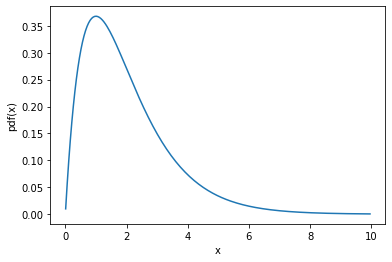

In [3]:
# Plot the prior distribution
x = np.arange(0.01, 10, 0.05)
y = [stats.gamma.pdf(xi, a, scale=1/b) for xi in x] 
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('pdf(x)')
plt.show()

In [4]:
# Generate timeseries samples
t = range(0, N)
x = np.zeros(N)

# Mean of the Poisson distribution at each timestep
lambdas = [lambda1_actual]*N
lambdas[n_actual:] = [lambda2_actual]*(N-n_actual)

x = stats.poisson.rvs(lambdas)

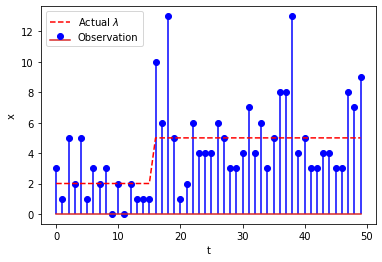

In [5]:
plt.stem(range(N),x,linefmt='b-', markerfmt='bo', label='Observation')
plt.plot(range(N), lambdas, '--r', label='Actual $\lambda$')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.show()

### Perform inference using Gibbs sampling

In [6]:
def sample_conditional_posterior_lambda1(a, b, x, n):
    """Draw a sample from the conditional posterior for lambda1."""
    
    assert len(x) > 0
    
    param_a = a + np.sum(x[:n])
    param_b = n + b
    
    return stats.gamma.rvs(a=param_a, scale=1.0/param_b)

In [7]:
def sample_conditional_posterior_lambda2(a, b, x, N, n):
    """Draw a sample from the conditional posterior for lambda2."""
    
    assert len(x) > 0
    assert n <= N
    
    param_a = a + np.sum(x[n:])
    param_b = N - n + b
    
    return stats.gamma.rvs(a=param_a, scale=1.0/param_b)    

In [8]:
import numpy
from numpy import log, exp
from numpy.random import multinomial

In [9]:
def sample_conditional_posterior_n(lambda1, lambda2, x, N):
    """Draw a sample from the conditional posterior for n."""
    
    assert len(x) > 0
    assert N == len(x)
    
    lambda1 = max(np.finfo(float).eps, lambda1)
    lambda2 = max(np.finfo(float).eps, lambda2)

    # Calculate the probability for each timestep
    p = np.array([0]*N)
    for n in range(N):
        p[n] = np.log(lambda1)*np.sum(x[:n]) - lambda1*n + \
                np.log(lambda2)*np.sum(x[n:]) - (N-n)*lambda2
    p = np.exp(p - np.max(p))
    
    # Normalise the probabilities
    p = p / np.sum(p)

    # Sampled value of n (changepoint)
    samples = np.random.multinomial(1, p)
    n = np.where(samples == 1)[0][0]
    assert samples[n] == 1

    return n

In [10]:
# Initialise the chain
lambda1 = [stats.gamma.rvs(a, scale=1/b)]
lambda2 = [stats.gamma.rvs(a, scale=1/b)]
n = [random.randint(0, N-1)]

In [11]:
for i in range(1, 5200):
    lambda1.append(sample_conditional_posterior_lambda1(a, b, x, n[i-1]))
    lambda2.append(sample_conditional_posterior_lambda2(a, b, x, N, n[i-1]))
    n.append(sample_conditional_posterior_n(lambda1[i], lambda2[i], x, N))

In [16]:
# Number of samples for the burn-in period
burnin = 200

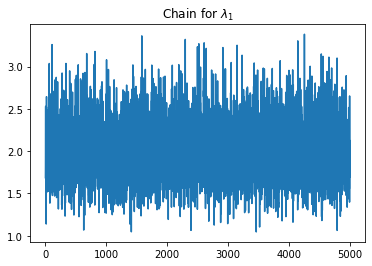

In [19]:
plt.plot(lambda1[burnin:])
plt.title('Chain for $\lambda_1$')
plt.show()

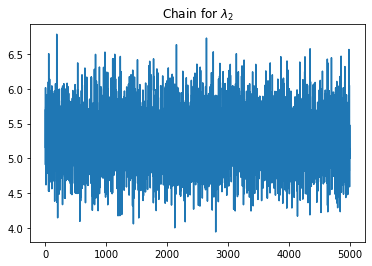

In [20]:
plt.plot(lambda2[burnin:])
plt.title('Chain for $\lambda_2$')
plt.show()

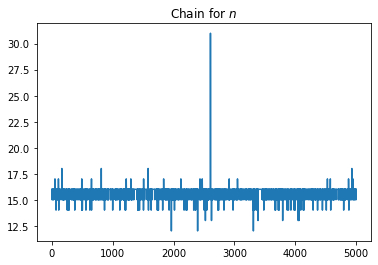

In [21]:
plt.plot(n[burnin:])
plt.title('Chain for $n$')
plt.show()

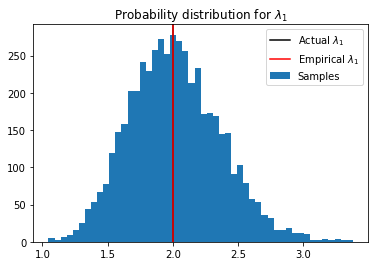

In [13]:
plt.hist(lambda1[burnin:], bins=50, label='Samples')
plt.axvline(x=lambda1_actual, color='k', label='Actual $\lambda_1$')
plt.axvline(x=np.mean(x[:n_actual]), color='r', label='Empirical $\lambda_1$')
plt.title('Probability distribution for $\lambda_1$')
plt.legend()
plt.show()

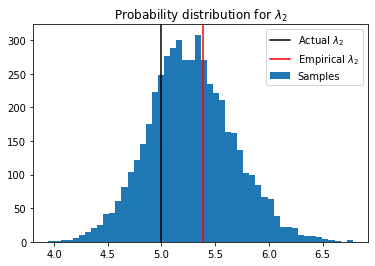

In [14]:
plt.hist(lambda2[burnin:], bins=50, label='Samples')
plt.axvline(x=lambda2_actual, color='k', label='Actual $\lambda_2$')
plt.axvline(x=np.mean(x[n_actual:]), color='r', label='Empirical $\lambda_2$')
plt.title('Probability distribution for $\lambda_2$')
plt.legend()
plt.show()

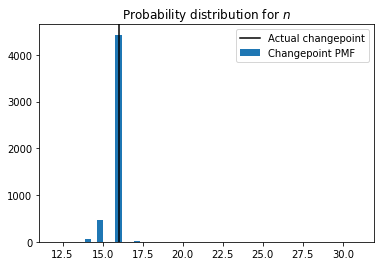

In [15]:
plt.hist(n[burnin:], bins=N, label='Changepoint PMF')
plt.axvline(x=n_actual, color='k', label='Actual changepoint')
plt.title('Probability distribution for $n$')
plt.legend()
plt.show()